In [1]:
#SET 1 Solutions

In [5]:
#Q1 A)
def count_letters_and_digits(sentence):
    letters_count = 0
    digits_count = 0

    for char in sentence:
        if char.isalpha():
            letters_count += 1
        elif char.isdigit():
            digits_count += 1

    return letters_count, digits_count

# Get user input
user_input = input("Enter a sentence: ")
letters, digits = count_letters_and_digits(user_input)

print(f"Number of letters: {letters}")
print(f"Number of digits: {digits}")

Enter a sentence: ABC 34DE
Number of letters: 5
Number of digits: 2


Enter the principal amount: 1000
The final amount after 15 years is: 2958.88


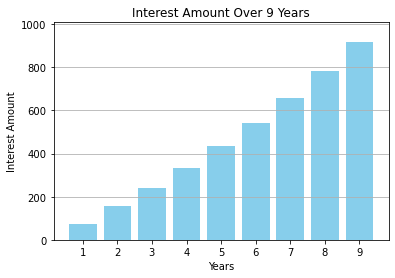

In [6]:
#Q1 B)
import matplotlib.pyplot as plt

def calculate_final_amount(principal, rate, years):
    """Calculate the final amount after a certain number of years."""
    return principal * (1 + rate / 100) ** years

def calculate_interest_over_years(principal, rate, max_years):
    """Calculate interest amounts for each year up to max_years."""
    interest_amounts = []
    for year in range(1, max_years + 1):
        final_amount = calculate_final_amount(principal, rate, year)
        interest_amounts.append(final_amount - principal)  # Interest = Final Amount - Principal
    return interest_amounts

# User input for principal
principal = float(input("Enter the principal amount: "))
rate = 7.5  # Annual interest rate
total_years = 15
max_years = 9

# Calculate final amount after 15 years
final_amount_15_years = calculate_final_amount(principal, rate, total_years)
print(f"The final amount after {total_years} years is: {final_amount_15_years:.2f}")

# Calculate interest over the first 9 years
interest_over_years = calculate_interest_over_years(principal, rate, max_years)

# Plotting the interest amounts
years = list(range(1, max_years + 1))
plt.bar(years, interest_over_years, color='skyblue')
plt.xlabel('Years')
plt.ylabel('Interest Amount')
plt.title('Interest Amount Over 9 Years')
plt.xticks(years)
plt.ylim(0, max(interest_over_years) * 1.1)  # Add a little space above the highest bar
plt.grid(axis='y')
plt.show()

In [7]:
#Q1 c)
from collections import Counter

def count_user_ids(array):
    # Flatten the 2D array
    flat_list = [user_id for sublist in array for user_id in sublist]
    
    # Count occurrences
    occurrences = Counter(flat_list)
    
    return dict(occurrences)

# Given 2D array
array = [[4, -3, 15], [15, 22, 4], [-3, 4, 22]]

# Get occurrences
result = count_user_ids(array)

# Print the result
print(result)

{4: 3, -3: 2, 15: 2, 22: 2}


In [19]:
#Q2 A)
import pandas as pd

# Load the data from the CSV file
df1 = pd.read_csv(r"C:\Users\pc\OneDrive\Desktop\work\Data\25824\q2\biketravel.csv")

# Convert start_time and end_time to datetime format
df1['start_time'] = pd.to_datetime(df1['start_time'], format='%d-%m-%Y %H:%M')
df1['end_time'] = pd.to_datetime(df1['end_time'], format='%d-%m-%Y %H:%M')

# Display the DataFrame
print(df1.head())

           start_time  start_terminal            end_time  end_terminal  \
0 2012-03-25 10:30:00           31214 2012-03-25 10:40:00         31106   
1 2012-03-28 18:59:00           31015 2012-03-28 19:11:00         31212   
2 2012-03-12 22:30:00           31616 2012-03-12 22:37:00         31503   
3 2012-03-12 20:11:00           31238 2012-03-12 20:15:00         31203   
4 2012-02-03 09:06:00           31107 2012-02-03 09:16:00         31239   

  bike_number  
0      W00576  
1      W00011  
2      W01215  
3      W00455  
4      W00576  


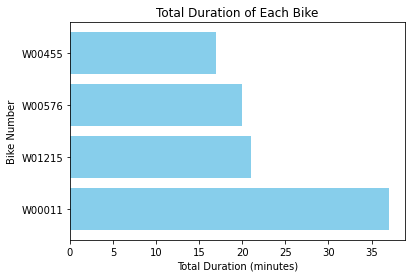

Bike used for the most time: W00011 with duration 37.0 minutes.


In [20]:
#Q2 B)
import matplotlib.pyplot as plt

# Calculate duration in minutes
df1['duration'] = (df1['end_time'] - df1['start_time']).dt.total_seconds() / 60

# Group by bike_number and sum the durations
bike_usage = df1.groupby('bike_number')['duration'].sum().reset_index()

# Sort by duration in decreasing order
bike_usage = bike_usage.sort_values(by='duration', ascending=False)

# Plotting
plt.barh(bike_usage['bike_number'], bike_usage['duration'], color='skyblue')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Bike Number')
plt.title('Total Duration of Each Bike')
plt.show()

# Identify the bike with the most usage
most_used_bike = bike_usage.iloc[0]
print(f"Bike used for the most time: {most_used_bike['bike_number']} with duration {most_used_bike['duration']} minutes.")

In [21]:
#Q2 C)
# Find the last time each bike was in use
last_usage = df1.groupby('bike_number')['end_time'].max().reset_index()

# Renaming columns for clarity
last_usage.columns = ['bike_number', 'last_used_time']

# Display the result
print(last_usage)

  bike_number      last_used_time
0      W00011 2012-03-30 20:00:00
1      W00455 2012-03-12 20:15:00
2      W00576 2012-03-25 10:40:00
3      W01215 2012-03-12 22:37:00


In [26]:
#Q3)Part 1
# Step 1: Load the dataset and split into X and Y
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (assuming it is in CSV format)
data = pd.read_csv(r"C:\Users\pc\OneDrive\Desktop\work\Data\25824\breastcancer.csv")

# Display the first few rows of the dataset
print(data.head())

# Identify independent variables (features) and dependent variable (target)
X = data.drop('diagnosis', axis=1)  # Assume 'diagnosis' is the target column
Y = data['diagnosis']  # Target column

# Step 2: Feature Engineering
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)  # Fill numerical columns with mean

# If there are categorical variables, apply one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 4: Perform Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Step 5: Make predictions on the test dataset
Y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Q3)Part 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\work\Data\25824\winejuice.csv')  # Adjust path to your dataset

# Display the first few rows of the dataset
print(data.head())

# Step 2: Identify independent variables (X) and dependent variable (Y)
# Assuming 'quality' is the target variable
X = data.drop('quality', axis=1)  # Features
Y = data['quality']  # Target

# Perform feature engineering
# Fill missing values (if any)
X.fillna(X.mean(), inplace=True)  # For numerical columns

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Step 4: Run Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 5: Predict values for test dataset
Y_pred = model.predict(X_test)

# Step 6: Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r_squared = r2_score(Y_test, Y_pred)

# Output the results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Value: {r_squared:.2f}")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   sucrose  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 